<div class="alert alert-block alert-success">
<b> <font size="+3"> <font color="black"> 
USDA, National Agriculture Imagery Program (NAIP): Image Processing Using Python </font color></font> </b> 

    
<font color="black"> _Author: Sushil Nepal_
    
<font color="black"> _Date: August 4th, 2023_ 
    
<font color="black"> _Objectives (Part 1):_ 
    
   <font color="black">  1. To import, explore, and visualize the 4-Channel (bands) NAIP imagery.

   <font color="black">  2. Calculate the Normalized Difference Vegetation Index (NDVI) using the red and near-infrared channles.

 <font color="black"> _Objectives (Part 2):_ 
    
   <font color="black"> 1. To sggenet the image using superpixells.

   <font color="black">  2. Generating shapefiles of the segments
</div>

# Part 1: Explore and Visualize the NAIP image using matplotlib and folium

## Step 1: I will first start by importing the required libraries

> #### For this exercise, I will be needing fucntion within numpy, rasterio, scikitlearn, and geopandas librarries to read, manipulate and analyzed the raster data (NAIP). While we will use libraries like matplotlib for visualization and folium to create the interactive maps. 

> ##### Lets get started by loading the required libraries

In [1]:
import numpy as np
import folium
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import geopandas as gpd
%matplotlib inline

In [ ]:
## Step 2: load the 4-band NAIP 
> #### I will load the imagery from the folder where it was stored into jupyter notebook environemnt using the rasterio-open function from rasterio library.To use this code you can change the path to where you have stored your imagery in your personal computer.We will also print about the projection of the naip image. Projection is important to know while visualizing the data in the later part of this exercise.
> ##### My NAIP image (test1.tif) is located in the Super_pixels subfolder under the folder Lassen_data in S drive. You can set the path to you folder by changing the code below

In [2]:
raster_path = "S:\\Lassen_data\\Super_pixels\\Test1.tif"
naip_data=rasterio.open(raster_path)

## Step 3: Explore the NAIP data 
> #### I will check the resolution, projection, number of rows-columns, and the number of bands of the image and print the results. I will also check the minimum and maximum cordinates within northing (Y) and easting (X).

In [3]:
print('Resolution X, Y:',naip_data.res)
print('Coordinate reference system (CRS):', naip_data.crs)
print('Width:', naip_data.width)
print('Height:', naip_data.height)
print('Number of bands:',naip_data.count)

# Get the minimum and maximum coordinates
min_x, min_y = naip_data.bounds.left, naip_data.bounds.bottom
max_x, max_y = naip_data.bounds.right, naip_data.bounds.top

print('Minimum X coordinate:', min_x)
print('Minimum Y coordinate:', min_y)
print('Maximum X coordinate:', max_x)
print('Maximum Y coordinate:', max_y)



Resolution X, Y: (0.6, 0.6)
Coordinate reference system (CRS): PROJCS["NAD83 / UTM zone 10N",GEOGCS["NAD83",DATUM["North American Datum 1983",SPHEROID["GRS 1980",6378137,298.257222101004]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Width: 9772
Height: 6734
Number of bands: 4
Minimum X coordinate: 606878.9999999421
Minimum Y coordinate: 4459342.199999564
Maximum X coordinate: 612742.1999999421
Maximum Y coordinate: 4463382.599999565


## Step 3: Visualize the image
> #### I will now visualize the image using matplotlib library. I will now plot all of the 4 bands together in one figure usign the _subplot ()_ function from matplotlib. I will also plot each band to its spatial extent using the _extent()_ function in each figure panel.I have included the optional code for turingin the axis lables and axis ticks on and off, howevre, I have put them as comment, you can undo the comments and run the code. 

Text(0.5, 0, 'Easting')

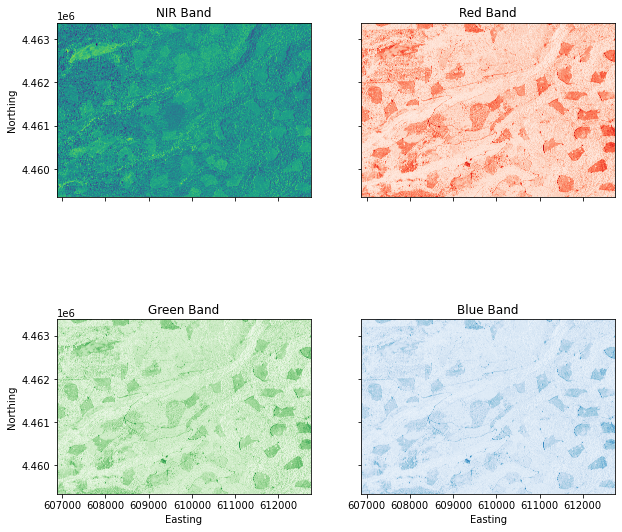

In [5]:

nir_band = naip_data.read(4)
blue_band = naip_data.read(3)
green_band = naip_data.read(2)
red_band = naip_data.read(1)

# Create a 2x2 grid of subplots
figure, axes = plt.subplots(2, 2, figsize=(10, 10),sharex=True,sharey=True)

# Plot the NIR band
nir_image = axes[0, 0].imshow(nir_band, cmap='viridis', extent=(naip_data.bounds.left,naip_data.bounds.right,
                                                               naip_data.bounds.bottom,naip_data.bounds.top))
axes[0, 0].set_title('NIR Band')
#axes[0, 0].set_xlabel('Easting')
axes[0, 0].set_ylabel('Northing')
#axes[0, 0].set_xticks([])


# Plot the Red band
red_image = axes[0, 1].imshow(red_band, cmap='Reds', extent=(naip_data.bounds.left,naip_data.bounds.right,
                                                               naip_data.bounds.bottom,naip_data.bounds.top))
axes[0, 1].set_title('Red Band')
#axes[0, 1].set_xlabel('Easting')
#axes[0, 1].set_ylabel('Northing')
##axes[0,1].set_yticks([])
#axes[0,1].set_xticks([])

# Plot the Green band
green_image = axes[1, 0].imshow(green_band, cmap='Greens', extent=(naip_data.bounds.left,naip_data.bounds.right,
                                                               naip_data.bounds.bottom,naip_data.bounds.top))
axes[1, 0].set_title('Green Band')
axes[1, 0].set_xlabel('Easting')
axes[1, 0].set_ylabel('Northing')


# Plot the Blue band
blue_image = axes[1, 1].imshow(blue_band, cmap='Blues', extent=(naip_data.bounds.left,naip_data.bounds.right,
                                                               naip_data.bounds.bottom,naip_data.bounds.top))
axes[1, 1].set_title('Blue Band')
axes[1, 1].set_xlabel('Easting')
#axes[1,1].set_xticks([])
#axes[1, 1].set_ylabel('Northing')

#### Lets try to visualize the image as a RGB cahnnel

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

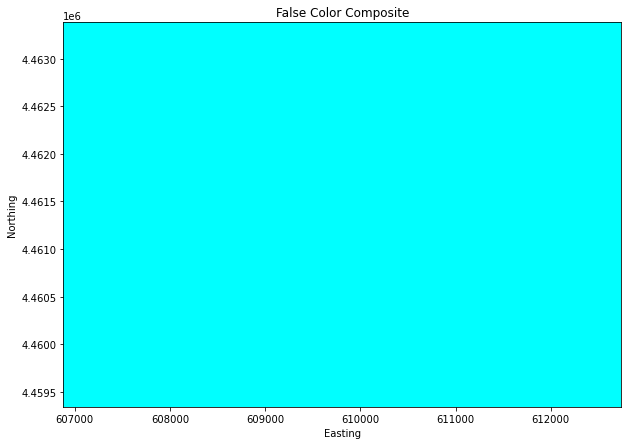

In [19]:
image_stack=np.dstack((red_band,green_band,blue_band))

# Create a 2x2 grid of subplots
figure, ax = plt.subplots(figsize=(10, 10))
# Plot the NIR band
nir_image = ax.imshow(image_stack, extent=(naip_data.bounds.left,naip_data.bounds.right,
                                                               naip_data.bounds.bottom,naip_data.bounds.top))
ax.set_title('False Color Composite')
ax.set_xlabel('Easting')
ax.set_ylabel('Northing')
#axes[0, 0].set_xticks([])


In [ ]:
<div class="alert alert-block alert-warning">
<b> Note:</b> Note that all we can see is blank image. Wondering why? Our data has been clipped to the extent of the [0 to1] for floats. IS my data within the valid range between 0 and 1. Certaily not!! 
</div>

##### Lets quickly make a histogram of each channel and visualize the range.


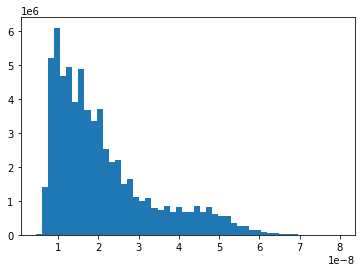

In [20]:
# I will use the red channel just for the exercise.
plt.figure
plt.hist (red_band.flatten(), bins=50)
plt.show ()


##### My values are way out of range between 0, and 1. They are less than 0. How can we fix this? Lets do it by min-max rescaling so that values get within the bound of 0 and 1

Text(0, 0.5, 'Northing')

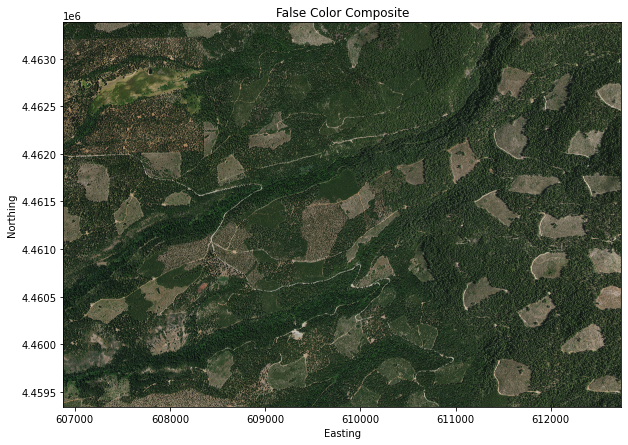

In [26]:
def scale (x):
    return((x-np.nanmin(x))/(np.nanmax(x)-np.nanmin(x)))

#### Lets apply to individual array 

blue_band = scale (blue_band)
green_band =scale (green_band)
red_band = scale (red_band)

image_stack1=np.dstack((red_band,green_band,blue_band))

# Create a 2x2 grid of subplots
figure, ax = plt.subplots(figsize=(10, 10))
# Plot the NIR band
nir_image = ax.imshow(image_stack1, extent=(naip_data.bounds.left,naip_data.bounds.right,
                                                               naip_data.bounds.bottom,naip_data.bounds.top))
ax.set_title('False Color Composite')
ax.set_xlabel('Easting')
ax.set_ylabel('Northing')
#axes[0, 0].set_xticks([])


In [ ]:
<div class="alert alert-block alert-success">
<b> Note:</b> TADA!! We have sucessfully rescale and lotted the RGB values within the extent. But the image appear to be dark.
</div>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0, 0.5, 'Northing')

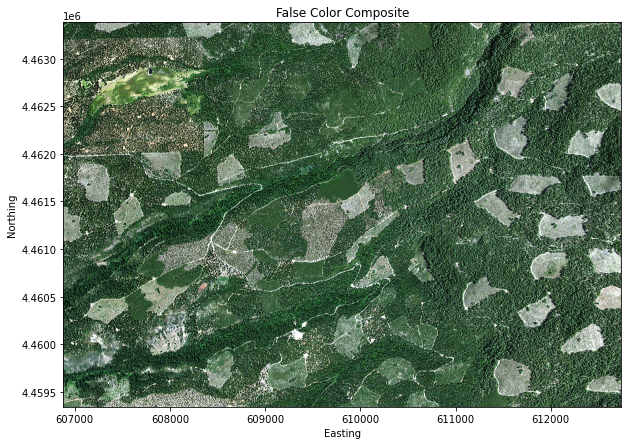

In [28]:
##### Lets try to increase the image brightness by doing another rescaling using the cumilative cut counts.
def scale_cuts (x):
    return((x-np.nanpercentile(x,2))/(np.nanpercentile(x, 98)-np.nanpercentile(x,2)))

#### Lets apply to individual array 

blue_band = scale_cuts(blue_band)
green_band =scale_cuts(green_band)
red_band = scale_cuts(red_band)

image_stack2=np.dstack((red_band,green_band,blue_band))

# Create a 2x2 grid of subplots
figure, ax = plt.subplots(figsize=(10, 10))
# Plot the NIR band
nir_image = ax.imshow(image_stack2, extent=(naip_data.bounds.left,naip_data.bounds.right,
                                                               naip_data.bounds.bottom,naip_data.bounds.top))
ax.set_title('False Color Composite')
ax.set_xlabel('Easting')
ax.set_ylabel('Northing')
#axes[0, 0].set_xticks([])


<div class="alert alert-block alert-success">
<b> Note:</b> Awesome!!! notice the difference between above and this image. This image is more brighter than above.
</div>

##### Lets try another scaling function (mean staundard devaition scalar) and see how image looks like. You can choose to disply them in any ways you want.I like the cumulative cut counts better.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0, 0.5, 'Northing')

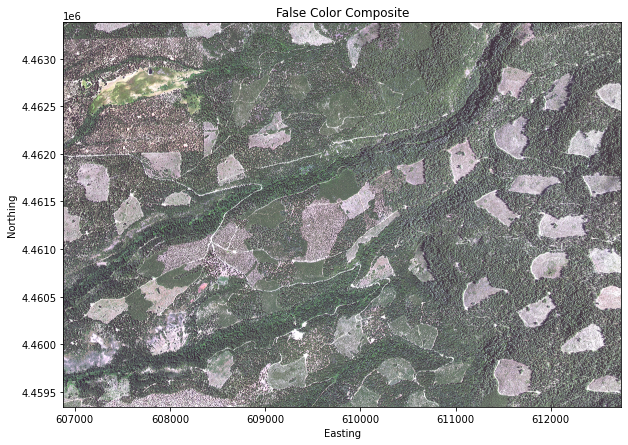

In [30]:
def scale_mean (x):
    return((x-(np.nanmean(x)-np.nanstd(x)*2))/((np.nanmean(x)+np.nanstd(x)*2)-(np.nanmean(x)-np.nanstd(x)*2)))

#### Lets apply to individual array 

blue_band = scale_mean(blue_band)
green_band =scale_mean(green_band)
red_band = scale_mean(red_band)

image_stack3=np.dstack((red_band,green_band,blue_band))

# Create a 2x2 grid of subplots
figure, ax = plt.subplots(figsize=(10, 10))
# Plot the NIR band
nir_image = ax.imshow(image_stack3, extent=(naip_data.bounds.left,naip_data.bounds.right,
                                                               naip_data.bounds.bottom,naip_data.bounds.top))
ax.set_title('False Color Composite')
ax.set_xlabel('Easting')
ax.set_ylabel('Northing')
#axes[0, 0].set_xticks([])


##### I will now convert the RGB image to jpeg image so that i canutlize it for image segmentation later.

In [37]:
import imageio


# Assuming you have the image stack in the variable `image_stack3`
# ... (your previous code to generate the image stack)

# Define the output file path
output_path = 'S:\\Lassen_data\\Super_pixels\\corrected.jpg'

# Convert the image stack to uint8 and scale to 0-255 range (required for JPEG)
image_stack_scaled = (image_stack2 * 255).astype('uint8')

# Save the image stack as JPEG
imageio.imwrite(output_path, image_stack_scaled, format='jpeg')
print(f"Image stack saved as '{output_path}'")

Image stack saved as 'S:\Lassen_data\Super_pixels\corrected.jpg'


## Step 4:  Get the bounds of the NAIP image and convert it to the polygon.
> #### I am using this step so that I can overlay the bound over the interactive ortho image to show where the study area lies and how imagery looks. For this part of exercise, I will use libraries such as rasterio to manipulate the raster and polygon data and folium to visualize over an interactive map.

In [7]:
from rasterio.crs import CRS
from shapely.geometry import Polygon
## Get the minimum and maximum coordinates
min_x, min_y = naip_data.bounds.left, naip_data.bounds.bottom
max_x, max_y = naip_data.bounds.right, naip_data.bounds.top

# Create a Polygon representing the bounding box and convert the crs  corresponding to NAIP data
bounding_box = Polygon([(min_x, min_y), (min_x, max_y), (max_x, max_y), (max_x, min_y)])

bounding_box_crs=naip_data.crs

# Create a GeoDataFrame with the bounding box
gdf = gpd.GeoDataFrame({'geometry': [bounding_box]}, crs=bounding_box_crs)

######### reproject  ###################
#gdf_epsg  =gdf.to_crs(epsg=26910)
gdf_epsg  =gdf.to_crs(epsg=4326) ## use this to plot with inbuit map in python
##################### plot ###############

gdf_epsg.geometry

0    POLYGON ((-121.74281 40.27774, -121.74213 40.3...
Name: geometry, dtype: geometry

In [ ]:
<div class="alert alert-block alert-warning">
<b> Note:</b> Note that folium takes epsg: 4326 projection , therfore I chnaged the projection of the bounding polygon to match up with folium map
</div>

## Step 4: Visualize in an interactive dashboard
> #### First I will convert the polygon into geojason format and then center the folium to the centre of the bounding box. I will adjust the initial zoom level to 12 and then add the World_Imgery map from ESRI as the base layer.Bounding box will be displyed over the base layer to show how NAIP imagery would look like

In [9]:

# Create a Folium map centered on the bounding box polygon
map_center = [gdf_epsg.centroid.y.values[0], gdf_epsg.centroid.x.values[0]]
folium_map = folium.Map(location=map_center, zoom_start=12)

# Convert the GeoDataFrame to a GeoJSON format
geojson_data = gdf_epsg.to_crs(epsg=4326).__geo_interface__

# Add the GeoJSON data to the Folium map
folium.GeoJson(geojson_data, name='bounding_box', style_function=lambda x: {'color': 'red', 'fillColor': 'red', 'weight': 3, 'fillOpacity': 0.1}).add_to(folium_map)

# Add ESRI World Imagery as the base map
folium.TileLayer(tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}', attr='ESRI World Imagery', name='ESRI World Imagery', overlay=True).add_to(folium_map)

# Display the map
folium_map



C:\Users\user\AppData\Local\Temp\ipykernel_11908\1184761914.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_center = [gdf_epsg.centroid.y.values[0], gdf_epsg.centroid.x.values[0]]
C:\Users\user\AppData\Local\Temp\ipykernel_11908\1184761914.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_center = [gdf_epsg.centroid.y.values[0], gdf_epsg.centroid.x.values[0]]


<div class="alert alert-block alert-warning">
<b> Note:</b> We adjusted the outline color, transparency, and outline width by passing the style-function on the folium map.
</div>

<div class="alert alert-block alert-danger">
<b> Caution:</b> The code mightnot disply the image here in github since it is an interactive map, but trust me when you run the code with your data it will work. 
</div>

# Part 2: Calculate NDVI using near infra-red and red channel

## Formula for NDVI



NDVI = $\frac{NIR-RED}{NIR+RED}$

_where NDVI= Normalized difference vegetation index, NIR= near infra-red band, RED= red band_


<div class="alert alert-block alert-warning">
<b> Note:</b> NDVI ranges between -1 to 1 where vlaues < 0 represents the bare ground and no-vegetation while values > 1 indicates vegetation.
</div>

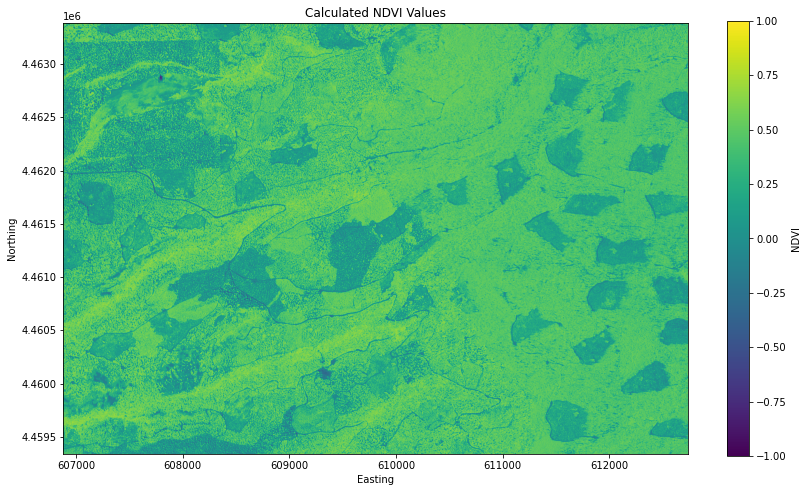

In [13]:
# Normalize the pixel values to the range of [-1, 1]
red_band = red_band.astype(float) / 232.0
nir_band = nir_band.astype(float) / 229.0

# Calculate NDVI
ndvi = (nir_band - red_band) / (nir_band + red_band)


# Create a 1x1 grid of subplots
figure, ax = plt.subplots(1, 1, figsize=(14,8 ))

# Plot the NDVI values within the extent of the original NAIP image 
ndvi_image = ax.imshow(ndvi, cmap='viridis', vmin=-1, vmax=1, extent=(naip_data.bounds.left,naip_data.bounds.right,
                                                               naip_data.bounds.bottom,naip_data.bounds.top))
ax.set_title('Calculated NDVI Values')
ax.set_xlabel('Easting')
ax.set_ylabel('Northing')

# Add a colorbar
cbar = plt.colorbar(ndvi_image, ax=ax, orientation='vertical')
cbar.set_label('NDVI')



In [ ]:

ndvi_meta = naip_data.meta.copy()
ndvi_meta.update({
    'count': 1,  # NDVI is a single band raster
    'dtype': rasterio.float32  # Use float32 data type for better precision
})

output_path = "S:\\Lassen_data\\Super_pixels\\ndvi.tif"
with rasterio.open(output_path, 'w', **ndvi_meta) as dst:
    dst.write(ndvi, 1)


<div class="alert alert-block alert-warning">
<b> Optional:</b> We can now export the ndvi data into the local folder in your computer.
</div>

##### Additonal method to plot the region of interest (bounding box ) over a non-interactive map

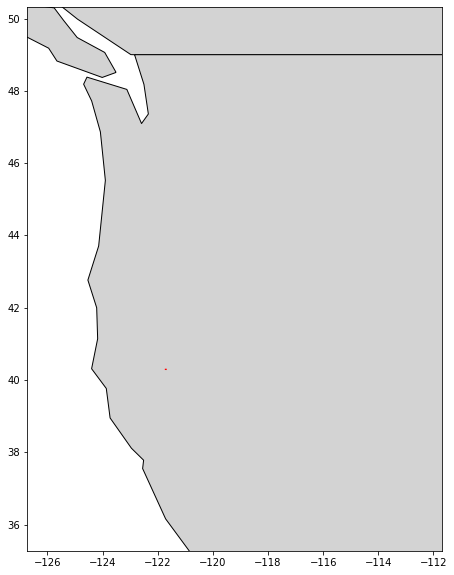

In [82]:
# Create a GeoDataFrame for the USA map using geopandas library
usa_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Calculate the extent of the bounding box
bbox_extent = gdf_epsg.total_bounds


# Plot the USA map
ax = usa_map.plot(figsize=(10, 10), color='lightgray', edgecolor='black')

# Set the axis limits to match the extent of the bounding box
ax.set_xlim(bbox_extent[0]-5, bbox_extent[2]+10)
ax.set_ylim(bbox_extent[1]-5, bbox_extent[3]+10)

# Plot the reprojected bounding box over the USA map
gdf_epsg.plot(ax=ax, color='red',alpha=1, linewidth=2000)
plt.show()

# Part 2: Image segmentation 

## Step 1: I will first start by importing the required libraries

> #### For this exercise, I will be needing fucntion within numpy, rasterio, scikitlearn, and geopandas librarries to read, manipulate and analyzed the raster data (NAIP). While we will use libraries like matplotlib for visualization and folium to create the interactive maps. 

> ##### Lets get started by loading the required libraries

In [90]:
import rasterio
from rasterio.features import shapes
from shapely.geometry import shape, mapping
import geopandas as gpd
from skimage.segmentation import slic

In [91]:
# Step 2: Load the raster data
raster_path = "S:\\Lassen_data\\Super_pixels\\Test1.tif"
naip_data = rasterio.open(raster_path)

In [109]:
segments_slic = slic(image_stack3, n_segments=1000, compactness=5, sigma=5,
                     start_label=1)
segments_slic = segments_slic.astype('int32')
segments_slic

array([[  1,   1,   1, ...,  10,  10,  10],
       [  1,   1,   1, ...,  10,  10,  10],
       [  1,   1,   1, ...,  10,  10,  10],
       ...,
       [134, 134, 134, ..., 139, 139, 139],
       [134, 134, 134, ..., 139, 139, 139],
       [134, 134, 134, ..., 139, 139, 139]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'SLIC')

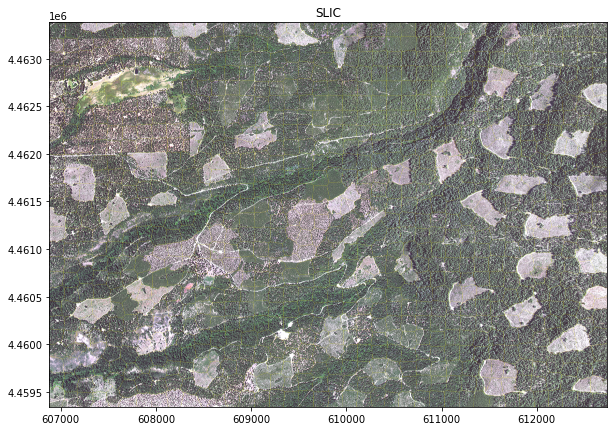

In [95]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(mark_boundaries(image_stack3,segments_slic),extent=(naip_data.bounds.left,naip_data.bounds.right,
                                                               naip_data.bounds.bottom,naip_data.bounds.top))
ax.set_title('SLIC')


In [110]:
# Step 3: Generate polygons from the labels using rasterio.features.shapes
segments = []
for geom, value in shapes(segments_slic, mask=(segments_slic > 0), transform=naip_data.transform):
    if value == 0:
        continue
    shape_obj = shape(geom)
    if shape_obj.is_empty or shape_obj.geom_type != "Polygon":
        continue
    segments.append(shape_obj)

# Step 4: Create a GeoDataFrame with the segment polygons
gdf = gpd.GeoDataFrame({"geometry": segments})

# Step 5: Write the GeoDataFrame to a shapefile
output_shapefile = "S:\\Lassen_data\\Super_pixels\\output7_shapefile.shp"
gdf.to_file(output_shapefile)
